In [20]:
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind
import matplotlib.pyplot as plt

df_c = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
df_t = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")
df_c.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [21]:
df_c.columns=[col +"_c" for col in df_c.columns]

In [22]:
df_c.mean()

Impression_c    101711.449068
Click_c           5100.657373
Purchase_c         550.894059
Earning_c         1908.568300
dtype: float64

In [23]:
df_t.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [24]:
df_t.mean()

Impression    120512.411758
Click           3967.549761
Purchase         582.106097
Earning         2514.890733
dtype: float64

In [25]:
df_t.columns = [col + "_t" for col in df_t.columns]

In [26]:
df = pd.concat([df_c,df_t],axis=1)
df.head()

,Impression_c,Click_c,Purchase_c,Earning_c,Impression_t,Click_t,Purchase_t,Earning_t
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


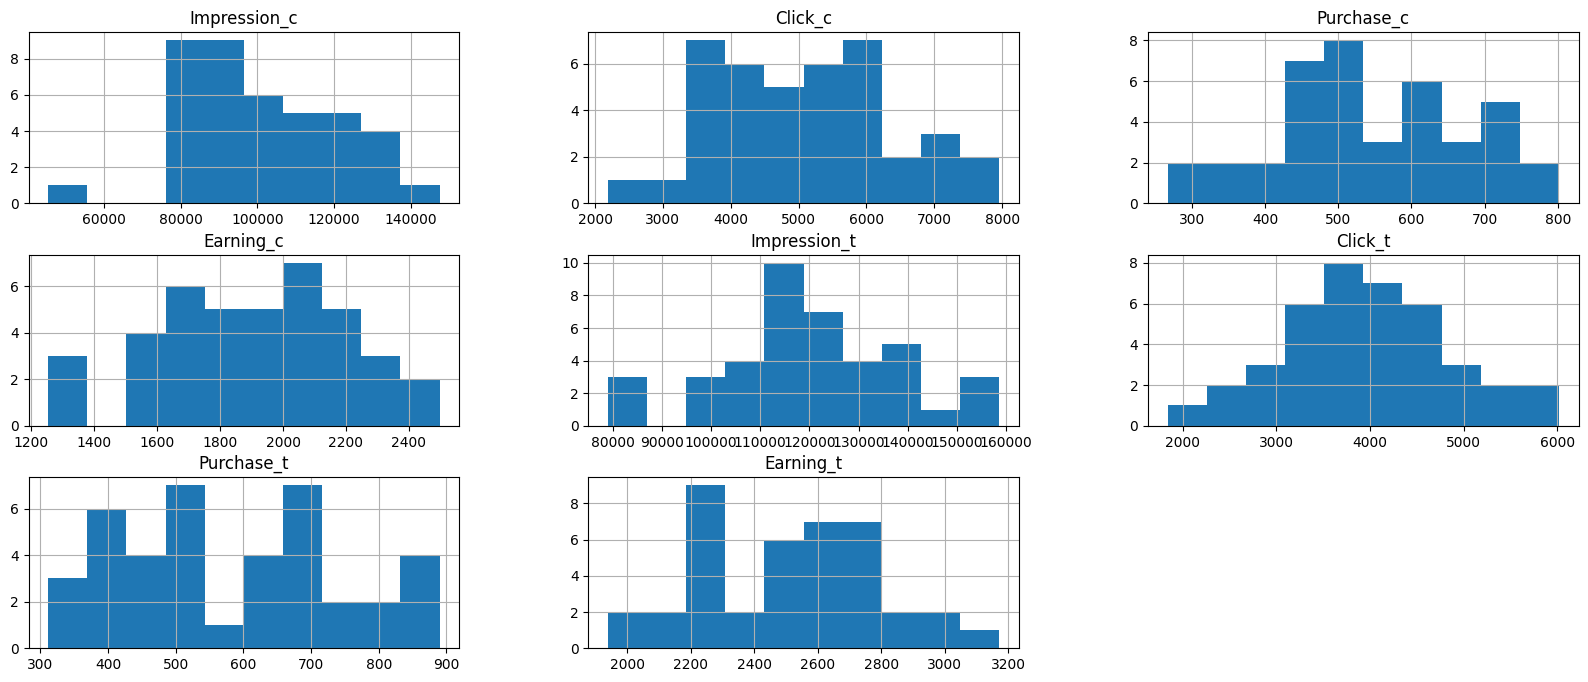

In [31]:
df.hist(figsize=(20,8))
plt.show()

In [32]:
#normallik testi
test_t, pvalue = shapiro(df["Purchase_c"])
print(f"pvalue {pvalue:.4f}")
# p> 0.05 normal

pvalue 0.5891


In [36]:
#normallik testi
test_t, pvalue = shapiro(df["Click_t"])
print(f"pvalue {pvalue:.4f}")
# p> 0.05 normal

pvalue 0.9699


In [35]:
#normallik testi
test_t, pvalue = shapiro(df["Purchase_t"])
print(f"pvalue {pvalue:.4f}")
# p> 0.05 normal

pvalue 0.1541


In [40]:
# varyans homojenliği testi
test_t, pvalue = levene(df["Purchase_c"],
                        df["Purchase_t"])
print(f"pvalue {pvalue:.4f}")
# p> 0.05 varyans homojendir

pvalue 0.1083


In [42]:
# koşullar sağladığı için parametrik test ttest_ind

test,pvalue = ttest_ind(df["Purchase_c"],
                        df["Purchase_t"],
                        equal_var=True)
print(f"pval {pvalue:.4f}")

# p > 0.05 aralarında fark yok

pval 0.3493
